#### Preliminaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import signal
from astropy.convolution import convolve, Gaussian2DKernel
from skimage.metrics import structural_similarity

#### Load image with filter centers

In [2]:
fttt2_im_no_center = np.load('images_and_data/fttt2_im_no_center.npy')

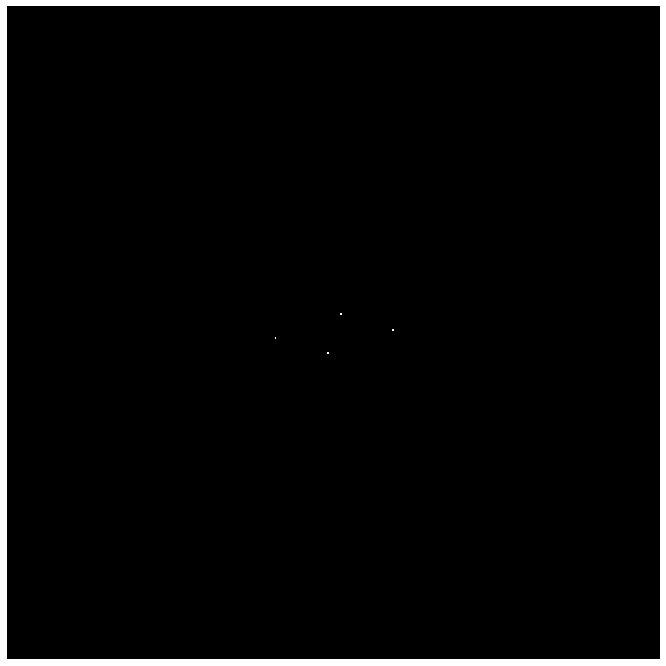

In [3]:
plt.figure(figsize=(12, 12))
plt.imshow(fttt2_im_no_center,  
           cmap='gray', interpolation = 'none'), plt.axis('off');

#### Make a `scipy`-only Gaussian 2D kernel similar to `astropy`'s

In [4]:
#print(Gaussian2DKernel.__doc__ )
#print(help(Gaussian2DKernel))

Inferring from the documentation, the size of `Gaussian2DKernel` is defined by std. It is std*8+1 in both x and y.

Test it:

In [5]:
kap = Gaussian2DKernel(7)
print (np.shape(kap), np.shape(kap)[0]//7, np.shape(kap)[1]//7)

(57, 57) 8 8


In [6]:
def scipy_gaussian_2D(std):
    '''
    2D Gaussian filter kernel similar to astropy\'s Gaussian2DKernel
    (https://docs.astropy.org/en/stable/api/astropy.convolution.Gaussian2DKernel.html#astropy.convolution.Gaussian2DKernel)
    using scipy.signal.gaussian 
    (and inspired by https://gist.github.com/thomasaarholt/267ec4fff40ca9dff1106490ea3b7567)
    
    Parameters: 
    std (int) : standard deviation of the Gaussian in pixels
    
    Returns:
    out (2D array): 2D Gaussian filter kernel
    '''
    ksp1D = signal.gaussian(std*8+1, std)
    ksp2D = np.outer(ksp1D, ksp1D)
    ksp2D /= (2*np.pi*(std**2))
    return ksp2D

In [7]:
ksp2D = scipy_gaussian_2D(7)
print (np.shape(ksp2D))

(57, 57)


Visual comparison

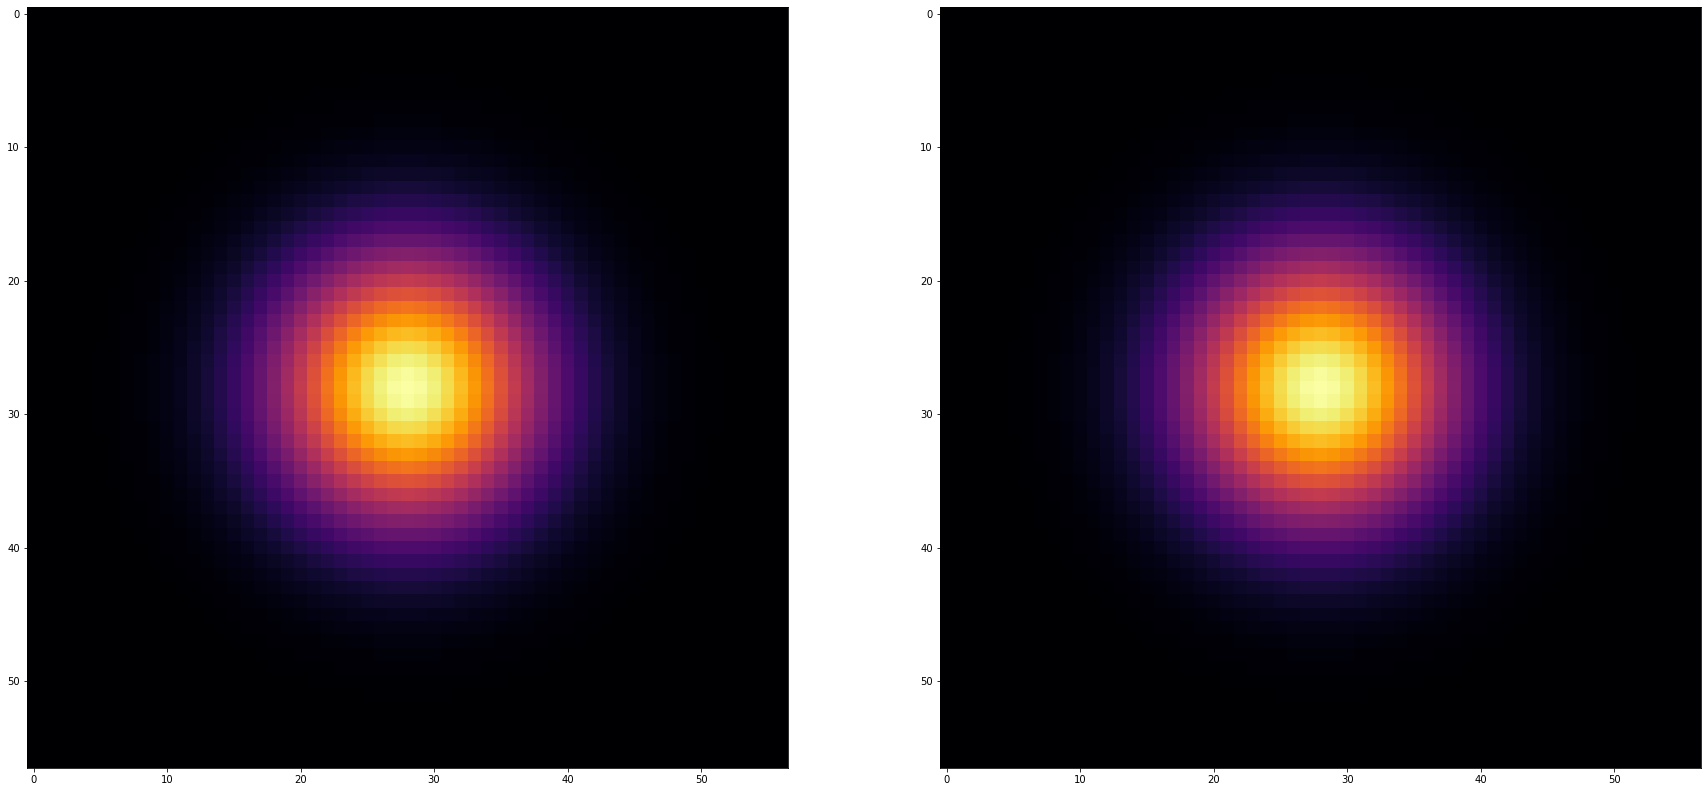

In [8]:
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.imshow(kap, cmap='inferno', interpolation = 'none')
plt.subplot(1, 2, 2)
plt.imshow(ksp2D, cmap='inferno', interpolation = 'none');

In [9]:
apt = (signal.fftconvolve(fttt2_im_no_center, kap, mode='same'))[100:-100,100:-100]
spt = (signal.fftconvolve(fttt2_im_no_center, ksp2D, mode='same'))[100:-100,100:-100]

Now visual comparison of the the two convolved results

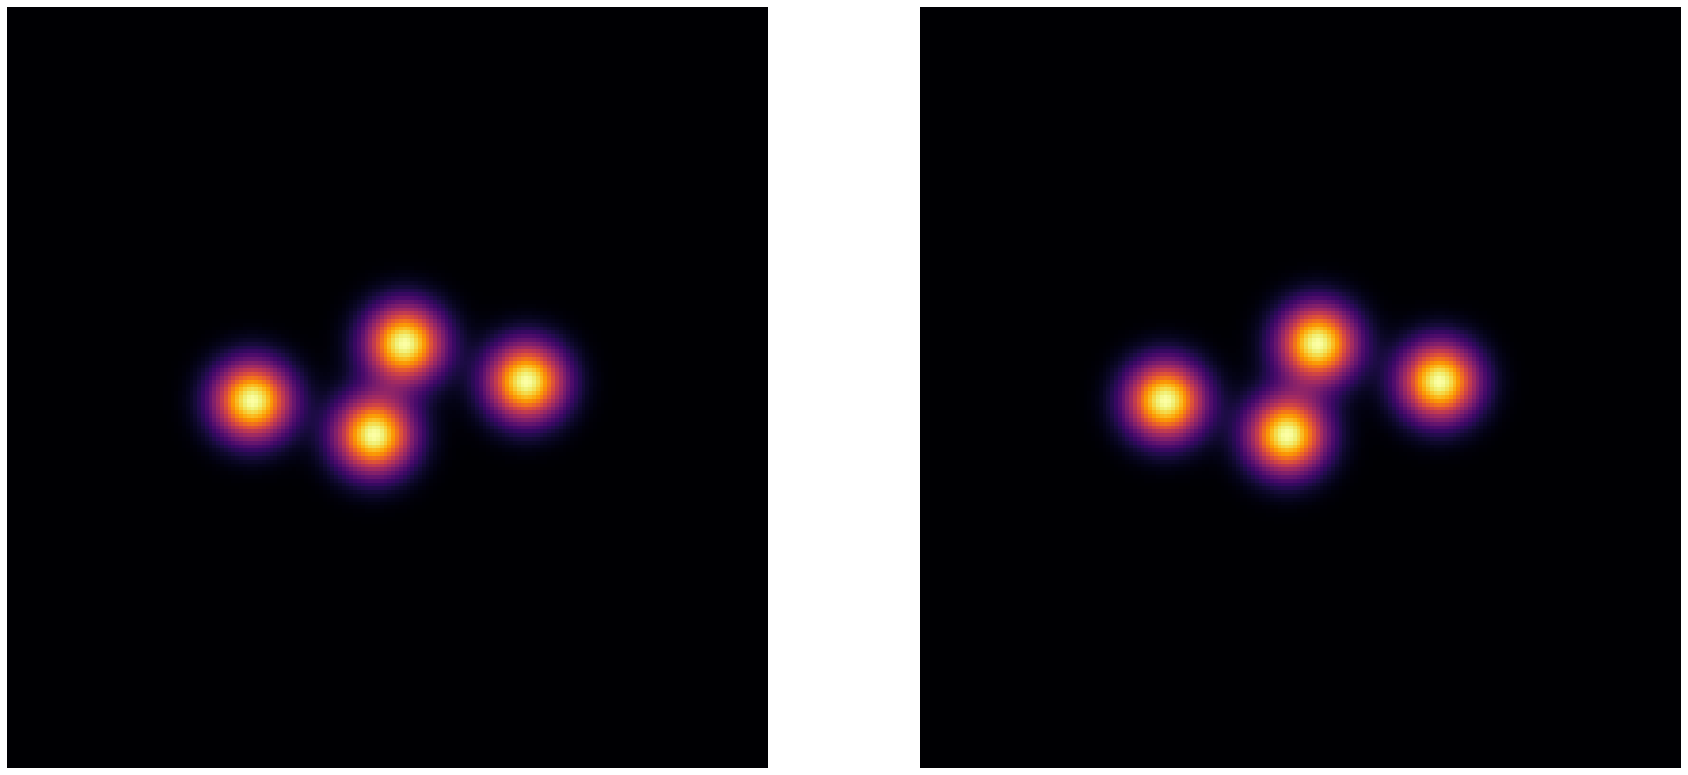

In [10]:
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.imshow(apt, cmap='inferno', interpolation = 'none'), plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(spt, cmap='inferno', interpolation = 'none'), plt.axis('off');

Numerical comparison

In [11]:
structural_similarity(apt, spt)

1.0